In [2]:
import os

# Display all files and folders
print(os.listdir("/"))
print(os.listdir("/content"))


['lib32', 'var', 'sys', 'etc', 'run', 'lib64', 'media', 'boot', 'root', 'dev', 'libx32', 'usr', 'srv', 'mnt', 'bin', 'lib', 'tmp', 'sbin', 'proc', 'home', 'opt', '.dockerenv', 'tools', 'datalab', 'content', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
['.config', 'sample_data']


In [3]:
from google.colab import files

# Manually upload the file
uploaded = files.upload()  # This will prompt you to upload a file


Saving telco_churn.csv to telco_churn.csv


In [4]:
print(uploaded.keys())  # List of uploaded filenames


dict_keys(['telco_churn.csv'])


In [5]:
# Dynamically load the dataset
file_name = list(uploaded.keys())[0]  # Retrieve the uploaded file's name
data = pd.read_csv('telco_churn.csv')  # Load the uploaded dataset


In [6]:
import os

# Display all files and folders
print(os.listdir("/"))
print(os.listdir("/content"))


['lib32', 'var', 'sys', 'etc', 'run', 'lib64', 'media', 'boot', 'root', 'dev', 'libx32', 'usr', 'srv', 'mnt', 'bin', 'lib', 'tmp', 'sbin', 'proc', 'home', 'opt', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
['.config', 'telco_churn.csv', 'sample_data']


<ipython-input-18-9431d72e3534>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Accuracy: 0.7977288857345636
Precision: 0.6571428571428571
Recall: 0.4932975871313673
ROC-AUC: 0.8374846025650314

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



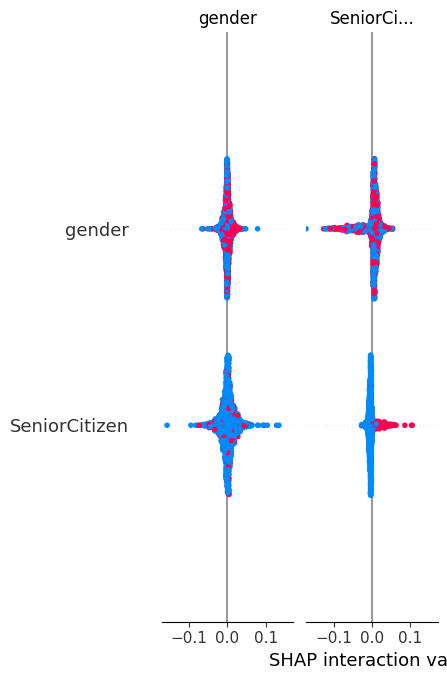

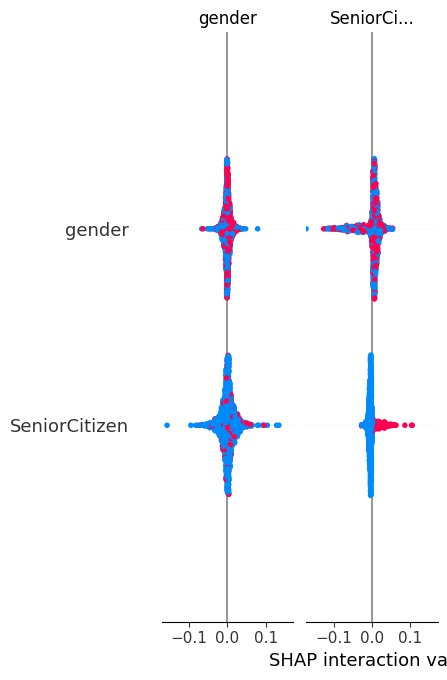

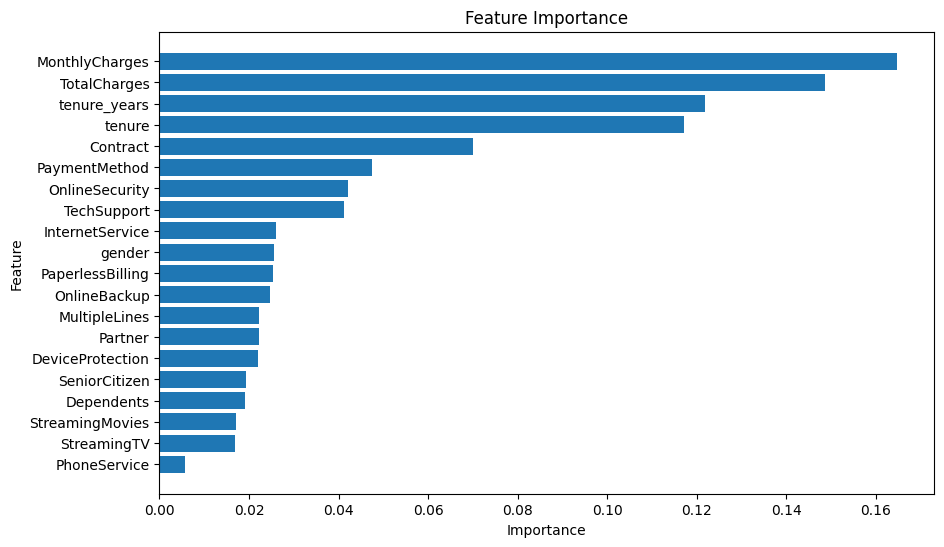

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import shap
import matplotlib.pyplot as plt

# Step 1: Data Collection
# Load dataset (use Telco Customer Churn Dataset or similar)
# Replace 'telco_churn.csv' with the path to your dataset
data = pd.read_csv('telco_churn.csv')

# Step 2: Feature Engineering
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column not in ['customerID', 'Churn']:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Create derived features (optional - example: tenure in years)
data['tenure_years'] = data['tenure'] / 12

# Define features (X) and target (y)
X = data.drop(['customerID', 'Churn'], axis=1)  # Drop irrelevant columns
y = data['Churn'].apply(lambda x: 1 if x == "Yes" else 0)  # Ensure binary labels

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Interpretation with SHAP
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test) # shap_values are calculated for X_test

# Use correct feature names
feature_names = X.columns  # Extract column names from preprocessed data

# SHAP summary plot
# Use X_test instead of X, as shap_values correspond to X_test
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
                                    # ^^^^^^^ Changed X to X_test

# Replace this line:
# shap.summary_plot(shap_values[1], X_test, feature_names=feature_names, plot_type="bar")

# With this line to use all SHAP values for the bar plot:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

# (Optional) Feature Importance Visualization with RandomForest
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()
